# Multilayer Perceptron and Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 

Consider the neural network considered in the first question of the theoretical component of the practical class, with number of units: 4,4,3,3.

![](https://drive.google.com/uc?id=1SHUgdosKp6AX8rRAACCZ5nb4kUXreI3g)

Assume all units, except the ones in the output layer, use the hyperbolic tangent activation function. 

Consider the following training example:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}^\intercal $,   $\mathbf{y} =\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix}$

❓ Using the squared error loss do a stochastic gradient descent update, initializing all connection weights and biases to 0.1 and a  learning rate η = 0.1:

1. Perform the forward pass
2. Compute the loss
3. Compute gradients with backpropagation
4. Update weights

In [2]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]
L = len(units) - 1

# Initialize weights with correct shapes
W = [None]
b = [None]

for l in range(1, L+1):
    W.append(np.ones((units[l], units[l-1])) * 0.1)
    print(f"W[{l}]:\n", W[l])
    b.append(np.ones((units[l])) * 0.1)
    print(f"b[{l}]:\n", b[l])

W[1]:
 [[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
b[1]:
 [0.1 0.1 0.1 0.1]
W[2]:
 [[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
b[2]:
 [0.1 0.1 0.1]
W[3]:
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
b[3]:
 [0.1 0.1 0.1]


In [3]:
# Forward Pass
z = [None]
h = [inputs[0]]
print(f"h[0] {h[0].shape}:\n", h[0])

for l in range(1, len(units)):
    z.append(W[l] @ h[l-1] + b[l])
    print(f"z[{l}] {z[l].shape}:\n", z[l])

    if l == L:
        break

    h.append(np.tanh(z[l]))
    print(f"h[{l}] {h[l].shape}:\n", h[l])

y_hat = z[L]
y = labels[0]

h[0] (4,):
 [1 0 1 0]
z[1] (4,):
 [0.3 0.3 0.3 0.3]
h[1] (4,):
 [0.29131261 0.29131261 0.29131261 0.29131261]
z[2] (3,):
 [0.21652504 0.21652504 0.21652504]
h[2] (3,):
 [0.21320353 0.21320353 0.21320353]
z[3] (3,):
 [0.16396106 0.16396106 0.16396106]


In [4]:
# Loss
loss = (1/2) * (y_hat - y) @ (y_hat - y)
print(f"Loss: {loss}")

Loss: 0.37636378397755565


In [5]:
# Backpropagation
dL_dz = [None] * (L+1)
dL_dW = [None] * (L+1)
dL_db = [None] * (L+1)
dL_dh = [None] * L

for l in range(L, 0, -1):
    if l == L:
        dL_dz[L] = y_hat - y
    
    else:
        dL_dh[l] = W[l+1].T @ dL_dz[l+1]
        print(f"dL/dh[{l}] {dL_dh[l].shape}:\n", dL_dh[l])

        dL_dz[l] = dL_dh[l] * (1 - h[l]**2)
    print(f"dL/dz[{l}] {dL_dz[l].shape}:\n", dL_dz[l])

    dL_dW[l] = np.outer(dL_dz[l], h[l-1])
    print(f"dL/dW[{l}] {dL_dW[l].shape}:\n", dL_dW[l])

    dL_db[l] = dL_dz[l]
    print(f"dL/db[{l}] {dL_db[l].shape}:\n", dL_db[l])

dL/dz[3] (3,):
 [ 0.16396106 -0.83603894  0.16396106]
dL/dW[3] (3, 3):
 [[ 0.03495708  0.03495708  0.03495708]
 [-0.17824646 -0.17824646 -0.17824646]
 [ 0.03495708  0.03495708  0.03495708]]
dL/db[3] (3,):
 [ 0.16396106 -0.83603894  0.16396106]
dL/dh[2] (3,):
 [-0.05081168 -0.05081168 -0.05081168]
dL/dz[2] (3,):
 [-0.048502 -0.048502 -0.048502]
dL/dW[2] (3, 4):
 [[-0.01412924 -0.01412924 -0.01412924 -0.01412924]
 [-0.01412924 -0.01412924 -0.01412924 -0.01412924]
 [-0.01412924 -0.01412924 -0.01412924 -0.01412924]]
dL/db[2] (3,):
 [-0.048502 -0.048502 -0.048502]
dL/dh[1] (4,):
 [-0.0145506 -0.0145506 -0.0145506 -0.0145506]
dL/dz[1] (4,):
 [-0.01331579 -0.01331579 -0.01331579 -0.01331579]
dL/dW[1] (4, 4):
 [[-0.01331579 -0.         -0.01331579 -0.        ]
 [-0.01331579 -0.         -0.01331579 -0.        ]
 [-0.01331579 -0.         -0.01331579 -0.        ]
 [-0.01331579 -0.         -0.01331579 -0.        ]]
dL/db[1] (4,):
 [-0.01331579 -0.01331579 -0.01331579 -0.01331579]


In [6]:
# Update Gradients
eta = 0.1
for l in range(1, L+1):
    W[l] -= eta * dL_dW[l]
    print(f"W[{l}]:\n", W[l])

    b[l] -= eta * dL_db[l]
    print(f"b[{l}]:\n", b[l])

W[1]:
 [[0.10133158 0.1        0.10133158 0.1       ]
 [0.10133158 0.1        0.10133158 0.1       ]
 [0.10133158 0.1        0.10133158 0.1       ]
 [0.10133158 0.1        0.10133158 0.1       ]]
b[1]:
 [0.10133158 0.10133158 0.10133158 0.10133158]
W[2]:
 [[0.10141292 0.10141292 0.10141292 0.10141292]
 [0.10141292 0.10141292 0.10141292 0.10141292]
 [0.10141292 0.10141292 0.10141292 0.10141292]]
b[2]:
 [0.1048502 0.1048502 0.1048502]
W[3]:
 [[0.09650429 0.09650429 0.09650429]
 [0.11782465 0.11782465 0.11782465]
 [0.09650429 0.09650429 0.09650429]]
b[3]:
 [0.08360389 0.18360389 0.08360389]


❓ Let's say we were using the same training example but with the following changes:
- The output units have a softmax activation function
- The error function is cross-entropy

Keeping the same initializations and learning rate, adjust your computations to the new changes.

**Solution:** We need only to change:  
- the output, *i.e.*, $\hat{y} = softmax(z_3)$ instead of $\hat{y} = z_3$
- the loss computation to $L = -y.log(\hat{y})$
- the gradient of the loss with respect to $z_3$: $\frac{dL}{dz_3}$

All other steps remain unchanged.

In [7]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]
L = len(units) - 1

# Initialize weights with correct shapes
W = [None]
b = [None]

for l in range(1, L+1):
    W.append(np.ones((units[l], units[l-1])) * 0.1)
    print(f"W[{l}]:\n", W[l])
    b.append(np.ones((units[l])) * 0.1)
    print(f"b[{l}]:\n", b[l])

# Forward Pass
z = [None]
h = [inputs[0]]
print(f"h[0] {h[0].shape}:\n", h[0])

for l in range(1, len(units)):
    z.append(W[l] @ h[l-1] + b[l])
    print(f"z[{l}] {z[l].shape}:\n", z[l])

    if l == L:
        break

    h.append(np.tanh(z[l]))
    print(f"h[{l}] {h[l].shape}:\n", h[l])

p = np.exp(z[L]) / np.sum(np.exp(z[L]))
y = labels[0]

# Loss
loss = - y @ np.log(p) # - y @ z[L] + np.log(np.sum(np.exp(z[L])))
print(f"Loss: {loss}")

# Backpropagation
dL_dz = [None] * (L+1)
dL_dW = [None] * (L+1)
dL_db = [None] * (L+1)
dL_dh = [None] * L

for l in range(L, 0, -1):
    if l == L:
        dL_dz[L] = -y + p
    
    else:
        dL_dh[l] = W[l+1].T @ dL_dz[l+1]
        print(f"dL/dh[{l}] {dL_dh[l].shape}:\n", dL_dh[l])

        dL_dz[l] = dL_dh[l] * (1 - h[l]**2)
    print(f"dL/dz[{l}] {dL_dz[l].shape}:\n", dL_dz[l])

    dL_dW[l] = np.outer(dL_dz[l], h[l-1])
    print(f"dL/dW[{l}] {dL_dW[l].shape}:\n", dL_dW[l])

    dL_db[l] = dL_dz[l]
    print(f"dL/db[{l}] {dL_db[l].shape}:\n", dL_db[l])

# Update Gradients
eta = 0.1
for l in range(1, L+1):
    W[l] -= eta * dL_dW[l]
    print(f"W[{l}]:\n", W[l])

    b[l] -= eta * dL_db[l]
    print(f"b[{l}]:\n", b[l])

W[1]:
 [[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
b[1]:
 [0.1 0.1 0.1 0.1]
W[2]:
 [[0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]
b[2]:
 [0.1 0.1 0.1]
W[3]:
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
b[3]:
 [0.1 0.1 0.1]
h[0] (4,):
 [1 0 1 0]
z[1] (4,):
 [0.3 0.3 0.3 0.3]
h[1] (4,):
 [0.29131261 0.29131261 0.29131261 0.29131261]
z[2] (3,):
 [0.21652504 0.21652504 0.21652504]
h[2] (3,):
 [0.21320353 0.21320353 0.21320353]
z[3] (3,):
 [0.16396106 0.16396106 0.16396106]
Loss: 1.0986122886681098
dL/dz[3] (3,):
 [ 0.33333333 -0.66666667  0.33333333]
dL/dW[3] (3, 3):
 [[ 0.07106784  0.07106784  0.07106784]
 [-0.14213569 -0.14213569 -0.14213569]
 [ 0.07106784  0.07106784  0.07106784]]
dL/db[3] (3,):
 [ 0.33333333 -0.66666667  0.33333333]
dL/dh[2] (3,):
 [-1.38777878e-17 -1.38777878e-17 -1.38777878e-17]
dL/dz[2] (3,):
 [-1.32469626e-17 -1.32469626e-17 -1.32469626e-17]
dL/dW[2] (3, 4):
 [[-3.85900728e-18 -3.85900728e-18 -3.85900728e-18 -3.85900728

❓ Complete functions `forward`, `compute_loss`, `backpropagation` and `update_weights` generalized to perform the same computations as before, but for any MLP architecture.

In [8]:
'''
x: single observation of shape (n,)
weights: list of weight matrices [W1, W2, ...]
biases: list of biases matrices [b1, b2, ...]

y: final output
hiddens: list of computed hidden layers [h1, h2, ...]
'''

def forward(x, weights, biases):
    num_layers = len(weights)
    g = np.tanh
    hiddens = []

    # compute hidden layers
    for i in range(num_layers):
        h = x if i == 0 else hiddens[i-1]
        z = weights[i] @ h + biases[i]
        if i < num_layers - 1:
            hiddens.append(g(z))

    #compute output
    output = z

    return output, hiddens

def compute_loss(output, y):
    # compute loss
    probs = np.exp(output) / np.sum(np.exp(output))
    loss = -y @ np.log(probs)
    return loss

def backward(x, y, output, hiddens, weights):
    num_layers = len(weights)
    g = np.tanh
    z = output

    probs = np.exp(output) / np.sum(np.exp(output))
    grad_z = probs - y
    
    grad_weights = []
    grad_biases = []
    
    # Backpropagate gradient computations
    for i in range(num_layers-1, -1, -1):
        # Gradient of hidden parameters.
        h = x if i == 0 else hiddens[i-1]
        grad_weights.append(np.outer(grad_z, h))
        grad_biases.append(grad_z)

        # Gradient of hidden layer below
        grad_h = weights[i].T @ grad_z

        # Gradient of hidden layer below before activation
        grad_z = grad_h * (1 - h**2)

    # Making gradient vectors have the correct order
    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

## Question 2

Now we will use the MLP on real data to classify handwritten digits.

Data is loaded, split into train and test sets and target is one-hot encoded below:

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()

inputs = data.data
labels = data.target
n, p = np.shape(inputs)
n_classes = len(np.unique(labels))

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), n_classes))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train_ohe = one_hot
one_hot = np.zeros((np.size(y_test, 0), n_classes))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test_ohe = one_hot

❓ Complete function `MLP_train_epoch` using your previously defined functions to compute one epoch of training using SGD:

In [10]:
'''
Outputs:
    - weights: list of updated weights
    - biases: list of updated 
    - loss: scalar of total loss (sum for all observations)

'''

def MLP_train_epoch(inputs, labels, weights, biases):
    num_layers = len(weights)
    total_loss = 0
    
    # For each observation and target
    for x, y in zip(inputs, labels):
        # Compute forward pass
        output, hiddens = forward(x, weights, biases)
        # Compute Loss and update total loss
        loss = compute_loss(output, y)
        total_loss += loss
        # Compute backpropagation
        grad_weights, grad_biases = backward(x, y, output, hiddens, weights)
        # Update weights
        for i in range(num_layers):
            weights[i] -= eta * grad_weights[i]
            biases[i] -= eta * grad_biases[i]

    return weights, biases, total_loss

Let's use a MLP with a single hidden layer of 50 units and a learning rate of $0.001$. 

❓ Run 100 epochs of your MLP. Save the loss at each epoch in a list and plot the loss evolution after training.

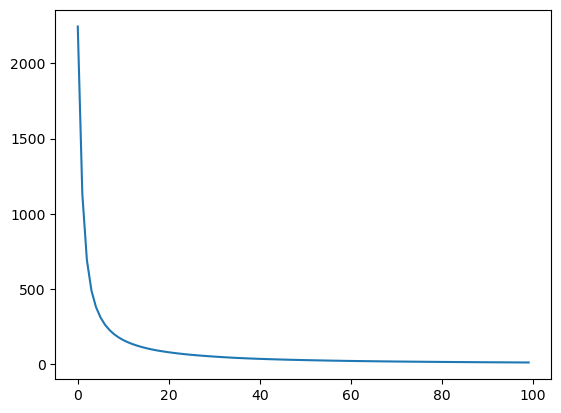

In [11]:
# Initialize weights
units = [p, 50, n_classes]
weights = [0.1 * np.random.randn(units[i+1], units[i]) for i in range(len(units) - 1)]
biases = [0.1 * np.random.randn(units[i+1]) for i in range(len(units) - 1)]
# Empty loss list
losses = []
# Learning rate.
eta = 0.001
# Run epochs and append loss to list
for epoch in range(100):
    weights, biases, loss = MLP_train_epoch(X_train, y_train_ohe, weights, biases)
    losses.append(loss)
# Plot loss evolution
plt.plot(losses)
plt.show()

❓ Complete function `MLP_predict` to get array of predictions from your trained MLP:

In [12]:
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        # Compute forward pass and get the class with the highest probability
        output, _ = forward(x, weights, biases)
        y_hat = np.argmax(output)
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

❓ Compute the accuracy on the train and test sets.

In [13]:
y_train_pred = MLP_predict(X_train, weights, biases)
y_test_pred = MLP_predict(X_test, weights, biases)

print(f'Train accuracy: {(y_train_pred==y_train).mean()}')
print(f'Test accuracy: {(y_test_pred==y_test).mean()}')

Train accuracy: 1.0
Test accuracy: 0.9777777777777777


We can compare our results with Sklearn's implementation of the MLP. Compare their accuracies:

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9993041057759221
0.9722222222222222
